In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from  keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from keras.layers import Conv2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


In [0]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()


In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


([], <a list of 0 Text yticklabel objects>)

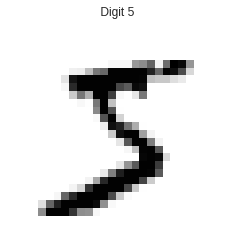

In [43]:
plt.imshow(x_train[0] )
plt.title(" Digit " + str(y_train[0]) )
plt.xticks([])
plt.yticks([])

In [44]:
# Normalizing the input
x_train= x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_train/=255
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_test = x_test.astype('float32')
x_test/=255
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [45]:
x_train[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980395],
       [0.7176471 ],
       [0.99215686],
       [0.99215686],
       [0.8117647 ],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

In [46]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

We use np_utils library from keras.utils to convert the target variable into multiple columns with values 0 or 1 depending on the value


In [47]:
y_train = np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
classifier = Sequential()

classifier.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
BatchNormalization(axis=-1) #Axis -1 is always the features axis
classifier.add(Activation('relu'))
 
classifier.add(Conv2D(32, (3,3)))
BatchNormalization(axis=-1)
classifier.add(Activation('relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
BatchNormalization(axis=-1)
classifier.add(Conv2D(64, (3,3)))
BatchNormalization(axis=-1)
classifier.add(Activation('relu'))
classifier.add(Conv2D(64, (3,3)))
classifier.add(Activation('relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Flatten())
BatchNormalization()
classifier.add(Dense(512))
BatchNormalization()
classifier.add(Activation('relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(10))
classifier.add(Activation('softmax'))

In [0]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# applying transformation to image
train_gen = ImageDataGenerator(rotation_range=8, 
                               width_shift_range=0.08, 
                               shear_range=0.3, 
                               height_shift_range=0.08, 
                               zoom_range=0.08 )
test_gen = ImageDataGenerator()

In [0]:
training_set= train_gen.flow(x_train, y_train, batch_size=64)
test_set= train_gen.flow(x_test, y_test, batch_size=64)

In [52]:
classifier.fit_generator(training_set, 
                         steps_per_epoch=60000//64, 
                         validation_data= test_set, 
                         validation_steps=10000//64, 
                         epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
937/937 [==============================] - 173s 184ms/step - loss: 0.2029 - acc: 0.9363 - val_loss: 0.0530 - val_acc: 0.9829
Epoch 2/5
937/937 [==============================] - 171s 182ms/step - loss: 0.0619 - acc: 0.9813 - val_loss: 0.0376 - val_acc: 0.9872
Epoch 3/5
937/937 [==============================] - 170s 182ms/step - loss: 0.0481 - acc: 0.9848 - val_loss: 0.0345 - val_acc: 0.9886
Epoch 4/5
937/937 [==============================] - 171s 182ms/step - loss: 0.0384 - acc: 0.9884 - val_loss: 0.0301 - val_acc: 0.9897
Epoch 5/5
937/937 [==============================] - 170s 182ms/step - loss: 0.0354 - acc: 0.9891 - val_loss: 0.0289 - val_acc: 0.9907


In [0]:
predictions = classifier.predict(x_test)


In [56]:
predictions[0]

array([1.4953224e-08, 3.2777720e-07, 3.4463828e-05, 2.2405125e-06,
       5.2893114e-07, 8.5540456e-08, 1.2603615e-10, 9.9994493e-01,
       1.9173542e-07, 1.7218486e-05], dtype=float32)

In [57]:
np.argmax(predictions[0])

7

In [59]:
np.argmax(y_test[0])

7

In [68]:
for i in range(10000):
  print("Actual Digit: " + str(np.argmax(y_test[i])) + "  Predicted Digit: " + str(np.argmax(predictions[i])))


Actual Digit: 7  Predicted Digit: 7
Actual Digit: 2  Predicted Digit: 2
Actual Digit: 1  Predicted Digit: 1
Actual Digit: 0  Predicted Digit: 0
Actual Digit: 4  Predicted Digit: 4
Actual Digit: 1  Predicted Digit: 1
Actual Digit: 4  Predicted Digit: 4
Actual Digit: 9  Predicted Digit: 9
Actual Digit: 5  Predicted Digit: 5
Actual Digit: 9  Predicted Digit: 9
Actual Digit: 0  Predicted Digit: 0
Actual Digit: 6  Predicted Digit: 6
Actual Digit: 9  Predicted Digit: 9
Actual Digit: 0  Predicted Digit: 0
Actual Digit: 1  Predicted Digit: 1
Actual Digit: 5  Predicted Digit: 5
Actual Digit: 9  Predicted Digit: 9
Actual Digit: 7  Predicted Digit: 7
Actual Digit: 3  Predicted Digit: 3
Actual Digit: 4  Predicted Digit: 4
Actual Digit: 9  Predicted Digit: 9
Actual Digit: 6  Predicted Digit: 6
Actual Digit: 6  Predicted Digit: 6
Actual Digit: 5  Predicted Digit: 5
Actual Digit: 4  Predicted Digit: 4
Actual Digit: 0  Predicted Digit: 0
Actual Digit: 7  Predicted Digit: 7
Actual Digit: 4  Predicted D